In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
def listdir_nohidden(path):
    f_list = [f for f in os.listdir(path) if not f.startswith('.')]
    return f_list
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import cartopy.crs as ccrs
import cartopy.feature as cft

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
figures_path = '/home/561/erd561/figures/CMIP5/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_domain = 'erd561@raijin.nci.org.au:'
remote_path = '/g/data/e14/erd561/CMIP5/Matt/'
local_path = remote_path

Figures will be saved in: /home/561/erd561/figures/CMIP5/p27_spaghetti_rcp85



In [4]:
u_10_hist_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/u_10_hist.nc', decode_times=False).U_10
u_10_hist = u_10_hist_raw.mean(dim='TIME')
print(u_10_hist)


u_10_rcp85_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/u_10_rcp85.nc', decode_times=False).U_10
u_10_rcp85 = u_10_rcp85_raw.mean(dim='TIME')
v_10_hist_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/v_10_hist.nc', decode_times=False).V_10
v_10_hist = v_10_hist_raw.mean(dim='TIME')
v_10_rcp85_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/v_10_rcp85.nc', decode_times=False).V_10
v_10_rcp85 = v_10_rcp85_raw.mean(dim='TIME')

<xarray.DataArray 'U_10' (LAT: 94, LON: 192)>
array([[-4.278852, -4.278852, -4.092235, ..., -4.959082, -4.785187, -4.785187],
       [-4.278852, -4.278852, -4.092235, ..., -4.959082, -4.785187, -4.785187],
       [-4.274554, -4.274554, -4.083707, ..., -5.043017, -4.839954, -4.839954],
       ...,
       [-0.103825, -0.103825, -0.180843, ...,  0.248468,  0.148579,  0.148579],
       [-0.358537, -0.358537, -0.394013, ..., -0.196817, -0.235122, -0.235122],
       [-0.358537, -0.358537, -0.394013, ..., -0.196817, -0.235122, -0.235122]],
      dtype=float32)
Coordinates:
  * LAT      (LAT) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
  * LON      (LON) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1


In [5]:
model_list = sorted(listdir_nohidden(local_path + 'hist_1980-1999/u10/'))

uas_lat_list = {}

uas_5069_list = {}
uas_5069_zonavg_list = {}
uas_8099_list = {}
uas_8099_zonavg_list = {}
uas_rcp85_list = {}
uas_rcp85_zonavg_list = {}

uas_5069_zonavg_list_nice = []
uas_8099_zonavg_list_nice = []
uas_rcp85_zonavg_list_nice = []

uas_lat_unique = arange(-90,90,0.5)

for model in model_list:
    print(model)
    uas_lat_list[model] = xr.open_dataset(
        local_path + 'hist_1980-1999/u10/' + model, decode_times=False)['lat'][:]
    
    uas_5069_list[model] = xr.open_dataset(
        local_path + 'hist_1950-1969/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_5069_zonavg_list[model] = np.nanmean(uas_5069_list[model], axis = 1)
    
    uas_8099_list[model] = xr.open_dataset(
        local_path + 'hist_1980-1999/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_8099_zonavg_list[model] = np.nanmean(uas_8099_list[model], axis = 1)
    
    uas_rcp85_list[model] = xr.open_dataset(
        local_path + 'rcp85/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_rcp85_zonavg_list[model] = np.nanmean(uas_rcp85_list[model], axis = 1)
    
    if model in ['ACCESS1-0.nc']:
        print(np.shape(uas_5069_zonavg_list[model]))
        
        uas_5069_zonavg_list_nice = np.interp(uas_lat_unique, uas_lat_list[model], uas_5069_zonavg_list[model])
        uas_8099_zonavg_list_nice = np.interp(uas_lat_unique, uas_lat_list[model], uas_8099_zonavg_list[model])
        uas_rcp85_zonavg_list_nice = np.interp(uas_lat_unique, uas_lat_list[model], uas_rcp85_zonavg_list[model])
        
        print(np.shape(uas_5069_zonavg_list_nice))
        
    else:
        print(np.shape(uas_5069_zonavg_list[model]))
        
        uas_5069_zonavg_list_nice = np.dstack((
            uas_5069_zonavg_list_nice, 
            np.interp(uas_lat_unique, uas_lat_list[model], uas_5069_zonavg_list[model])))

        uas_8099_zonavg_list_nice = np.dstack((
            uas_8099_zonavg_list_nice, 
            np.interp(uas_lat_unique, uas_lat_list[model], uas_8099_zonavg_list[model])))
            
        uas_rcp85_zonavg_list_nice = np.dstack((
            uas_rcp85_zonavg_list_nice, 
            np.interp(uas_lat_unique, uas_lat_list[model], uas_rcp85_zonavg_list[model])))
        
        print(np.shape(uas_5069_zonavg_list_nice))
        
        
    
#     print(model + ' OK!')
    
uas_5069_zonavg_MMM = np.squeeze(np.mean(uas_5069_zonavg_list_nice, axis=2))
uas_8099_zonavg_MMM = np.squeeze(np.mean(uas_8099_zonavg_list_nice, axis=2))
uas_rcp85_zonavg_MMM = np.squeeze(np.mean(uas_rcp85_zonavg_list_nice, axis=2))

print(np.shape(uas_5069_zonavg_MMM))

#print(uas_list)

ACCESS1-0.nc
(144,)
(361,)
ACCESS1-3.nc
(144,)
(1, 361, 2)
CMCC-CM.nc
(240,)
(1, 361, 3)
CMCC-CMS.nc
(96,)
(1, 361, 4)
CNRM-CM5.nc
(128,)
(1, 361, 5)
CSIRO-Mk3-6-0.nc
(96,)
(1, 361, 6)
CanESM2.nc
(64,)
(1, 361, 7)
FGOALS-s2.nc
(108,)
(1, 361, 8)
GFDL-CM3.nc
(90,)
(1, 361, 9)
GFDL-ESM2G.nc
(90,)
(1, 361, 10)
GFDL-ESM2M.nc
(90,)
(1, 361, 11)
HadGEM2-AO.nc
(144,)
(1, 361, 12)
IPSL-CM5A-LR.nc
(96,)
(1, 361, 13)
IPSL-CM5A-MR.nc
(143,)
(1, 361, 14)
IPSL-CM5B-LR.nc
(96,)
(1, 361, 15)
MIROC-ESM-CHEM.nc
(64,)
(1, 361, 16)
MIROC-ESM.nc
(64,)
(1, 361, 17)
MPI-ESM-MR.nc
(96,)
(1, 361, 18)
MRI-CGCM3.nc
(160,)
(1, 361, 19)
MRI-ESM1.nc
(160,)
(1, 361, 20)
NorESM1-M.nc
(96,)
(1, 361, 21)
(361,)


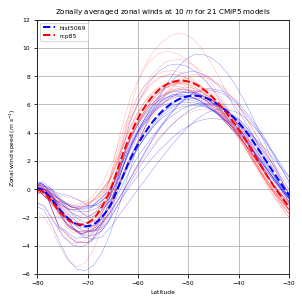

In [6]:
fig = plt.figure()
fig.set_size_inches(4,4)
matplotlib.rcParams.update({'font.size': 6}) 

# cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)

style = itertools.cycle(('-', '--', ':')) 
color = itertools.cycle(('r', 'g', 'b', 'y', 'orange', 'k', 'purple')) 
for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=0.7, color='b')

style = itertools.cycle(('-', '--', ':')) 
color = itertools.cycle(('r', 'g', 'b', 'y', 'orange', 'k', 'purple')) 
for model in model_list:
    plt.plot(uas_lat_list[model], uas_rcp85_zonavg_list[model], 
             linestyle='-', linewidth=0.2, alpha=0.7, color='r')

p1, = plt.plot(uas_lat_unique, uas_5069_zonavg_MMM, linewidth=2, color='b',  linestyle='--')
p2, = plt.plot(uas_lat_unique, uas_rcp85_zonavg_MMM, linewidth=2, color='r',  linestyle='--')
plt.legend((p1, p2), ('hist5069', 'rcp85'), loc='upper left')

plt.grid()
plt.xlim(-80, -30)
plt.ylim(-6, 12)
plt.title('Zonally averaged zonal winds at 10 $m$ for 21 CMIP5 models')
plt.xlabel('Latitude')
plt.ylabel('Zonal wind speed ($m\ s^{-1}$)')


fig.tight_layout(pad=0, w_pad=0.5, h_pad=0.5)

# output_ls = os.listdir(figures_path)
# if not script_name:
#     script_name = 'test'
# elif script_name not in output_ls:
#     os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig1_' + '.png', bbox_inches='tight', dpi=300)

Bbox(x0=0.125, y0=0.3914705882352941, x1=0.35294117647058826, y1=0.88)
Bbox(x0=0.3985294117647059, y0=0.125, x1=0.9000000000000001, y1=0.34705882352941175)
Bbox(x0=0.6720588235294118, y0=0.3914705882352941, x1=0.9000000000000001, y1=0.6135294117647059)
Bbox(x0=0.3985294117647059, y0=0.6579411764705883, x1=0.9000000000000001, y1=0.88)


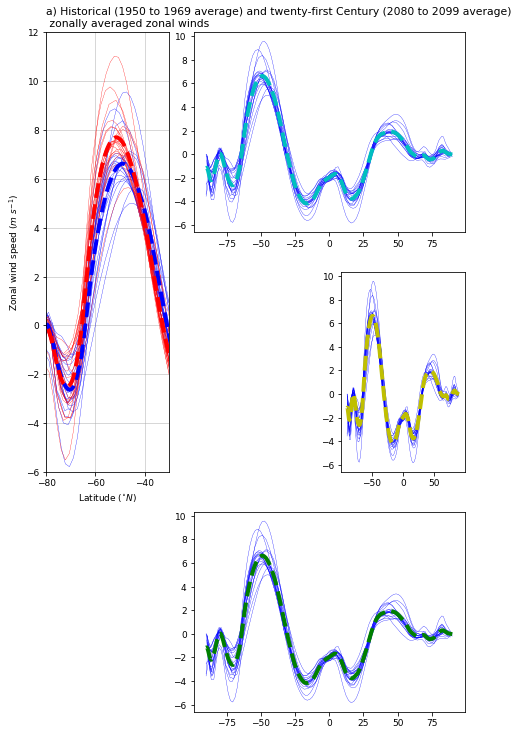

In [7]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# General plotting stuff
plot_labels=['(a) ','(b) ','(c) ','(d)']
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='',
                                    linewidth=1)

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import pylab as plot
params = {'legend.handlelength': 6}
plot.rcParams.update(params)

row = 4
col = 2
fig = plt.figure()
fig.set_size_inches(7.5,12.5)
matplotlib.rcParams.update({'font.size': 9}) 

def custom_plot(row=1, col=1, pos=1, 
                rows=1, cols=1, poss=(1,1),
                x=0, y=0, h=0, w=0,
                xr=1, yr=1, hr=1, wr=1):
        
        
    if row == 1 and col == 1:
        plt.figure(2)
        ax = plt.gca()
        ax_pos = ax.get_position()
        print(ax_pos)
        plt.close(2)
        if x!=0 or y!=0 or h!=0 or w!=0:
            fig.add_axes([
                ax_pos.x0+x,
                ax_pos.y0+y,
                ax_pos.x1-ax_pos.x0+h,
                ax_pos.y1-ax_pos.y0+w])
        elif xr!=1 or yr!=1 or hr!=1 or wr!=1:
            fig.add_axes([
                ax_pos.x0*xr,
                ax_pos.y0*yr,
                (ax_pos.x1-ax_pos.x0)*hr,
                (ax_pos.y1-ax_pos.y0)*wr])
        else:
            fig.add_axes([
                ax_pos.x0,
                ax_pos.y0,
                (ax_pos.x1-ax_pos.x0),
                (ax_pos.y1-ax_pos.y0)])
        
        
    else:
        if rows == 1 and cols == 1 and poss == (1,1):
            plt.figure(2)
            ax = plt.subplot(row, col, pos)
            ax_pos = ax.get_position()
            plt.close(2)
            if x!=0 or y!=0 or h!=0 or w!=0:
                fig.add_axes([
                    ax_pos.x0+x,
                    ax_pos.y0+y,
                    ax_pos.x1-ax_pos.x0+h,
                    ax_pos.y1-ax_pos.y0+w])
            elif xr!=1 or yr!=1 or hr!=1 or wr!=1:
                fig.add_axes([
                    ax_pos.x0*xr,
                    ax_pos.y0*yr,
                    (ax_pos.x1-ax_pos.x0)*hr,
                    (ax_pos.y1-ax_pos.y0)*wr])
            else:
                fig.add_axes([
                    ax_pos.x0,
                    ax_pos.y0,
                    (ax_pos.x1-ax_pos.x0),
                    (ax_pos.y1-ax_pos.y0)])
                
            
        else:
            plt.figure(2)
            ax = plt.subplot2grid(
                (row, col), (poss[0]-1,poss[1]-1), rows, cols)
            ax_pos = ax.get_position()
            print(ax_pos)
            plt.close(2)
            if x!=0 or y!=0 or h!=0 or w!=0:
                fig.add_axes([
                    ax_pos.x0+x,
                    ax_pos.y0+y,
                    ax_pos.x1-ax_pos.x0+h,
                    ax_pos.y1-ax_pos.y0+w])
            elif xr!=1 or yr!=1 or hr!=1 or wr!=1:
                fig.add_axes([
                    ax_pos.x0*xr,
                    ax_pos.y0*yr,
                    (ax_pos.x1-ax_pos.x0)*hr,
                    (ax_pos.y1-ax_pos.y0)*wr])
            else:
                fig.add_axes([
                    ax_pos.x0,
                    ax_pos.y0,
                    (ax_pos.x1-ax_pos.x0),
                    (ax_pos.y1-ax_pos.y0)])    
        
    
    
custom_plot(row=3, col=3, rows=2, cols=1, poss=(1,1))

# ax = plt.subplot2grid((row, col), (0, 0), rowspan=2, colspan=2)
# cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)

for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='b')

for model in model_list:
    plt.plot(uas_lat_list[model], uas_rcp85_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='r')

p1, = plt.plot(uas_lat_unique, uas_5069_zonavg_MMM, linewidth=4, color='b',  linestyle='--')
p2, = plt.plot(uas_lat_unique, uas_rcp85_zonavg_MMM, linewidth=4, color='r',  linestyle='--')


# print(h)
# plt.legend((p1, p2), ('Historical MMM', 'Twenty-first Century MMM'), loc='upper left')

plt.grid(linewidth=0.5)
plt.xlim(-80, -30)
plt.ylim(-6, 12)
plt.title('a) Historical (1950 to 1969 average) and twenty-first Century (2080 to 2099 average) \n '\
          'zonally averaged zonal winds', loc='left')
plt.xlabel('Latitude ($^{\circ}N$)')
plt.ylabel('Zonal wind speed ($m\ s^{-1}$)')



custom_plot(row=3, col=3, rows=1, cols=2, poss=(3,2))
for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='b')
p1, = plt.plot(uas_lat_unique, uas_5069_zonavg_MMM, linewidth=4, color='g',  linestyle='--')

custom_plot(row=3, col=3, rows=1, cols=1, poss=(2,3))
for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='b')
p1, = plt.plot(uas_lat_unique, uas_5069_zonavg_MMM, linewidth=4, color='y',  linestyle='--')

custom_plot(row=3, col=3, rows=1, cols=2, poss=(1,2))
for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='b')
p1, = plt.plot(uas_lat_unique, uas_5069_zonavg_MMM, linewidth=4, color='c',  linestyle='--')



# ax = plt.subplot2grid((row, col), (2, 0), rowspan=1, colspan=1, 
#                           projection=ccrs.PlateCarree(central_longitude=180))
# anom = u_10_rcp85 - u_10_hist
# cont_lev = arange(-1.5,1.5,0.25)
# ax.add_feature(land_50m)
# ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree(central_longitude=180))
# ax.set_xticks([-180, -120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# contf = anom.plot.contourf(add_colorbar=False, levels=cont_lev, 
#                            cmap=plt.cm.PRGn, extend='both', transform=ccrs.PlateCarree())
# plt.grid(linewidth=0.5)
# plt.title(r'b) MMM zonal wind speed anomaly', loc='left')
# plt.xlabel('Longitude ($^{\circ}E$)')
# plt.ylabel('Latitude ($^{\circ}N$)')

# ax = plt.subplot2grid((row, col),(2, 1), rowspan=1, colspan=1, 
#                           projection=ccrs.PlateCarree(central_longitude=180))
# anom = v_10_rcp85 - v_10_hist
# ax.add_feature(land_50m)
# ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree(central_longitude=180))
# ax.set_xticks([-180, -120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# contf = anom.plot.contourf(add_colorbar=False, levels=cont_lev, 
#                            cmap=plt.cm.PRGn, extend='both', transform=ccrs.PlateCarree())
# plt.grid(linewidth=0.5)
# plt.title(r'c) MMM meridional wind speed anomaly', loc='left')
# plt.xlabel('Longitude ($^{\circ}E$)')
# plt.ylabel('')

# ax = plt.subplot2grid((row, col), (3, 0), rowspan=1, colspan=2)
# ax_divider = make_axes_locatable(ax)
# cax1 = ax_divider.append_axes("top", size=0.1)
# cbar = plt.colorbar(contf, cax=cax1, orientation='horizontal', drawedges=True)
# cbar.set_label(r'$u_{10},v_{10}$ ($m\ s^{-1}$)') 
# ax.axis('off')
# fig.tight_layout(pad=0, w_pad=0.5, h_pad=1)

# output_ls = os.listdir(figures_path)
# if not script_name:
#     script_name = 'test'
# elif script_name not in output_ls:
#     os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig2_' + '.png', bbox_inches='tight', dpi=300)

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.9, y1=0.88)


Text(0.5, 0, 'Latitude ($^{\\circ}N$)')

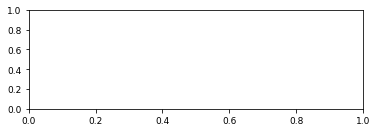

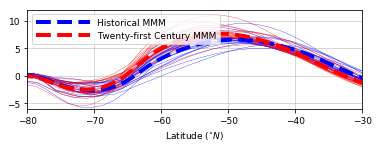

In [64]:
import matplotlib.gridspec as gridspec

plt.figure(1)
ax = plt.subplot(2,1,1)
ax_pos = ax.get_position()
print(ax_pos)


fig = plt.figure(2)
fig.add_axes(ax_pos)

for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='b')

for model in model_list:
    plt.plot(uas_lat_list[model], uas_rcp85_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='r')

p1, = plt.plot(uas_lat_unique, uas_5069_zonavg_MMM, linewidth=4, color='b',  linestyle='--')
p2, = plt.plot(uas_lat_unique, uas_rcp85_zonavg_MMM, linewidth=4, color='r',  linestyle='--')


# print(h)
plt.legend((p1, p2), ('Historical MMM', 'Twenty-first Century MMM'), loc='upper left')

plt.grid(linewidth=0.5)
plt.xlim(-80, -30)
plt.ylim(-6, 12)
# plt.title('a) Historical (1950 to 1969 average) and twenty-first Century (2080 to 2099 average) \n '\
#           'zonally averaged zonal winds')
plt.xlabel('Latitude ($^{\circ}N$)')
# plt.ylabel('Zonal wind speed ($m\ s^{-1}$)')

